**Data Scientist uchun A/B test:**

Muayyan o'zgarish foydalanuvchi xatti-harakatiga qanday ta'sir qilganini statistik asosda isbotlash.

Misollar:

```
Yangi tugma dizayni konversiyani oshirdimi?
```

```
Yangi narx strategiyasi ko'proq sotuv olib keldimi?
```

```
Email sarlavhasi A va B foydalanuvchilarga qanday ta'sir qildi?
```

**Gipoteza tuzish (Statistik asos)**

🎯 Noldan gipoteza (H₀):

A va B varianti o'rtasida farq yo'q

H₀: p_A = p_B

💡 Muqobil gipoteza (H₁):

A va B variantlar o'rtasida farq bor

H₁: p_A ≠ p_B

**Eksperiment dizayni (tajriba tuzish)**

Bu bosqich Data Scientist uchun muhim!

Kerakli jihatlar:

| Asosiy narsa     | Tavsif                                              |
| ---------------- | --------------------------------------------------- |
| 🎯 Target metric | O‘lchanadigan qiymat (konversiya, o‘rtacha savdo)   |
| 🧪 Guruhlar      | A (control), B (variant) — tasodifiy ajratish kerak |
| 📊 Sample size   | Har bir guruhda yetarli odam bo‘lishi kerak         |
| ⏱ Vaqt           | Kamida 1-2 hafta (foydalanuvchi tsikliga qarab)     |


**Ma'lumot yig'ish**

Har bir foydalanuvchi uchun:

Guruh (A yoki B)

Harakat (bosdimi, sotib oldimi, ochdimi)

Vaqt, qurilma, manba, va h.k.

Misol uchun DataFrame:

| user\_id | group | clicked |
| -------- | ----- | ------- |
| 1        | A     | 0       |
| 2        | B     | 1       |
| 3        | A     | 0       |
| 4        | B     | 1       |


**Tahlil qilish (Statistical Testing)**

Agar metrika:

Proporsiya bo'lsa (masalan, bosishlar) → **z-test**

O'rtacha qiymat bo'lsa (chek miqdori, savdo) → **t-test**

3 yoki undan ortiq guruh bo'lsa → **ANOVA**



**Python orqali real A/B test tahlili (Proporsiya)**

In [1]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Misol data
successes = [200, 250]  # A va B guruhida bosganlar soni
samples = [1000, 1000]  # Har bir guruhdagi foydalanuvchilar soni

# Z-test (proportion)
stat, pval = proportions_ztest(count=successes, nobs=samples)

print(f"Z-score: {stat:.4f}")
print(f"P-value: {pval:.4f}")

if pval < 0.05:
    print("Bilan A o‘rtasida statistik farq bor (H1 qabul qilinadi)")
else:
    print("Farq statistik ahamiyatga ega emas (H0 rad qilinmaydi)")

Z-score: -2.6774
P-value: 0.0074
Bilan A o‘rtasida statistik farq bor (H1 qabul qilinadi)


**Tahlil natijasi va tavsiyalar**

Talqin qilish:

p-value < 0.05: farq tasodif emas → yangilanishni joriy qilish mumkin

p-value > 0.05: farq yo‘q → eskisini saqlab qolish mumkin

Uplift (yaxshilanish foizi) ham hisoblanadi:

In [2]:
p_A = 200 / 1000
p_B = 250 / 1000

uplift = (p_B - p_A) / p_A * 100
print(f"Yaxshilanish (uplift): {uplift:.2f}%")

Yaxshilanish (uplift): 25.00%


**A/B testda muhim statistik tushunchalar**

| Termin                | Ma’nosi                                                                   |
| --------------------- | ------------------------------------------------------------------------- |
| **p-value**           | Farq tasodif bo‘lish ehtimoli (past bo‘lsa, yaxshi)                       |
| **alpha (α)**         | Qabul qilingan xatolik darajasi (odatda 0.05)                             |
| **confidence level**  | Ishonch darajasi (odatda 95%)                                             |
| **statistical power** | Haqiqiy farqni aniqlash imkoniyati (odatda 80% dan yuqori bo‘lishi kerak) |


Sample size (namuna hajmi)ni oldindan hisoblash

Bu uchun statsmodels yoki scipy kutubxonalaridan foydalaniladi:

In [3]:
from statsmodels.stats.power import zt_ind_solve_power

# Misol: proporsiya A = 0.1, B = 0.12, alpha = 0.05, power = 0.8
effect_size = 0.12 - 0.10
sample_size = zt_ind_solve_power(effect_size=0.02, alpha=0.05, power=0.8, alternative='two-sided')
print(f"Kerakli sample size: {int(sample_size)} foydalanuvchi har bir guruhga")

Kerakli sample size: 39244 foydalanuvchi har bir guruhga


A/B testni noto'g'ri bajarishdan ehtiyot bo'ling

| Xatolik                                        | Tushuntirish              |
| ---------------------------------------------- | ------------------------- |
| 🎯 Noto‘g‘ri gipoteza                          | Aniq savol yo‘q           |
| 🧮 Yetarli sample yo‘q                         | Natija ishonchsiz bo‘ladi |
| ⏰ Testni erta to‘xtatish                       | Yolg‘on ijobiy chiqadi    |
| 🔁 Foydalanuvchini bir necha guruhga tushirish | Biased natija beradi      |


Kutubxonalarni chaqirish

In [4]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

Data yaratish

In [6]:
# Random urug‘ (reproducibility uchun)
np.random.seed(42)

# Guruh o'lchami
n_A = 1000
n_B = 1000

# Konversiya ehtimollari (A pastroq, B balandroq)
p_A = 0.10
p_B = 0.12

# Har bir foydalanuvchi bosdimi yoki yo‘qmi
group_A = np.random.binomial(1, p_A, n_A)
group_B = np.random.binomial(1, p_B, n_B)

# DataFrame shaklida birlashtirish
df = pd.DataFrame({
    'group': ['A'] * n_A + ['B'] * n_B,
    'converted': np.concatenate([group_A, group_B])
})

df.head()

,group,converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


Ma'lumotlarni tahlil qilish

In [7]:
# Guruhlar bo‘yicha konversiya foizlari
conversion_rates = df.groupby('group')['converted'].mean()
print(conversion_rates)

group
A    0.100
B    0.112
Name: converted, dtype: float64


Vizualizatsiya

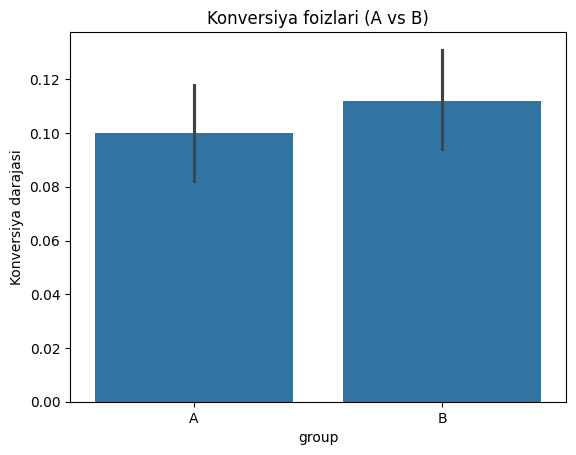

In [8]:
sns.barplot(x='group', y='converted', data=df)
plt.title("Konversiya foizlari (A vs B)")
plt.ylabel("Konversiya darajasi")
plt.show()

Z-test (proporsiyalar farqini tekshirish)

In [9]:
successes = df.groupby('group')['converted'].sum().values
samples = df.groupby('group')['converted'].count().values

z_stat, p_value = proportions_ztest(count=successes, nobs=samples)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Farq statistik jihatdan muhim (H0 rad qilindi)")
else:
    print("❌ Farq statistik jihatdan ahamiyatli emas (H0 rad qilinmadi)")

Z-statistic: -0.8717
P-value: 0.3834
❌ Farq statistik jihatdan ahamiyatli emas (H0 rad qilinmadi)


Uplift (farq foizi) hisoblash

In [10]:
uplift = (conversion_rates['B'] - conversion_rates['A']) / conversion_rates['A'] * 100
print(f"Yaxshilanish (uplift): {uplift:.2f}%")

Yaxshilanish (uplift): 12.00%
